Gerekli Importları ekliyoruz.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import RidgeClassifier,LogisticRegression
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')




Dataset ekliyoruz. Bu verisetinde yapmaya çalıştığım şey verilen diğer bilgilere göre kullanıcının rezarvazyonu tamamlayacakmı  yoksa tamamlamadan çıkacakmı diye tahmin etmeye çalışacağım.

In [2]:
df=pd.read_csv('data/customer_booking.csv',encoding='latin-1')
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Hiç null veri bulunmuyor bu yüzden herhangi bir düzenleme yapmamıza gerek yok sadece kategorisel verileri ML için uygun hale getirebiliriz.

In [4]:
df.head(4)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


df['route'].unique().__len__()


OUTPUT : 799 Görüldüğü gibi çok fazla benzersiz değer var bunlara tahmin etmek istediğim zaman daha kolay ulaşabilemek adına OneHotEncoding Kullanacağım.

In [5]:
ohe=OneHotEncoder()
ohed=ohe.fit_transform(df[['sales_channel','trip_type','flight_day','route','booking_origin']]).toarray()

In [6]:
ohe.get_feature_names_out()

array(['sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip',
       'flight_day_Fri', 'flight_day_Mon', 'flight_day_Sat',
       'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue',
       'flight_day_Wed', 'route_AKLDEL', 'route_AKLHGH', 'route_AKLHND',
       'route_AKLICN', 'route_AKLKIX', 'route_AKLKTM', 'route_AKLKUL',
       'route_AKLMRU', 'route_AKLPEK', 'route_AKLPVG', 'route_AKLTPE',
       'route_AORICN', 'route_AORKIX', 'route_AORKTM', 'route_AORMEL',
       'route_AORPER', 'route_AORPUS', 'route_BBIMEL', 'route_BBIOOL',
       'route_BBIPER', 'route_BBISYD', 'route_BDOCTS', 'route_BDOCTU',
       'route_BDOHGH', 'route_BDOICN', 'route_BDOIKA', 'route_BDOKIX',
       'route_BDOMEL', 'route_BDOOOL', 'route_BDOPEK', 'route_BDOPER',
       'route_BDOPUS', 'route_BDOPVG', 'route_BDOSYD', 'route_BDOTPE',
       'route_BDOWUH', 'route_BDOXIY', 'route_BKICKG', 'route_BKICTS',
       'route_BKICTU', 'route_BKIDE

Şimdi bunları veri setine eklemek için bir dataframe ekleyeceğim

In [7]:
ohed = pd.DataFrame(ohed,columns=ohe.get_feature_names_out())
ohed.head()

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Şimdi bunu bizim verisetimize ekelyeceğiz.

In [8]:
df.drop(columns=['sales_channel','trip_type','flight_day','route','booking_origin'], inplace=True)

In [9]:
df[ohed.columns]=ohed

Şu anda ML için uygun hale geldi veri setimiz buradan sonra korelasyon ilişkilerini çıkartıp eğer ilişki önemsenmeyecek derece az olan var ise onaları verisetinden performans için çıkartıcağız.

In [10]:
df_corr=pd.read_csv('data/customer_booking.csv',encoding='latin-1')
df_corr = df_corr.drop(columns=['sales_channel','flight_day','route','booking_origin','trip_type'])

In [11]:
corr_matrix = df_corr.corr()

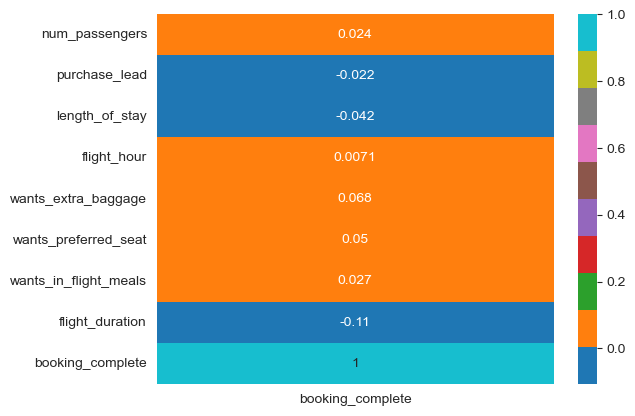

In [12]:
sns.heatmap(corr_matrix[["booking_complete"]], cmap='tab10', annot=True)
plt.show()

Şimdi az korelasyon olanları çıkartalım.

In [13]:
df.drop(["flight_hour","purchase_lead"], axis=1, inplace=True)

In [14]:
df.head(3)

,num_passengers,length_of_stay,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,19,1,0,0,5.52,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,20,0,0,0,5.52,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,22,1,1,0,5.52,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Artık test ve train oluşturabiliriz.

50000 veri olduğu için %80 yeterli diye düşünüyorum.

In [30]:
y=df['booking_complete']
x=df.drop('booking_complete', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=43)

Artık model oluşturabiliriz öncelikle RandomForestClassifier kullanacağım.

In [16]:
rf=RandomForestClassifier()
model = rf.fit(x_train, y_train)
model.score(x_test, y_test)

0.8347

In [17]:
rf=RandomForestClassifier(n_estimators=200)
model = rf.fit(x_train, y_train)
model.score(x_test, y_test)

0.8355

In [17]:
cv = cross_val_score(model, x, y, cv=4)
cv

array([0.84688, 0.75192, 0.27296, 0.72096])

Şimdi karmaşıklık matrisini oluşturup değerlere bakalım

In [18]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
cm

0.8347


array([[8088,  405],
       [1248,  259]], dtype=int64)

Şimdi ise farklı bir model ile sonuclara bakacağım 

In [19]:
xgbp = xgb.XGBClassifier()
xgb_model = xgbp.fit(x_train, y_train)
xgb_model.score(x_test, y_test)

0.85

In [20]:
cv_xgb = cross_val_score(xgb_model, x_train, y_train, cv=4)
cv_xgb

array([0.8469, 0.8509, 0.8513, 0.85  ])

In [21]:
y_pred_xgb = xgb_model.predict(x_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(accuracy)
cm_xgb

0.85


array([[8349,  144],
       [1356,  151]], dtype=int64)

In [103]:
xgb_params = {
    'max_depth': [3, 4, 5, 6],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2, 5]
}


In [104]:
xgb_model = xgb.XGBClassifier()

xgb_randomcv_model = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=xgb_params, 
                                       n_iter=100, 
                                       cv=5, 
                                       scoring='accuracy', 
                                       n_jobs=-1, 
                                       verbose=2).fit(x_train, y_train)


print('En iyi parametreler:', xgb_randomcv_model.best_params_)
print('En iyi accuracy score:', xgb_randomcv_model.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
En iyi parametreler: {'subsample': 1.0, 'reg_lambda': 5, 'reg_alpha': 0.5, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.6}
En iyi accuracy score: 0.851675


In [22]:
rc = RidgeClassifier()
rc_model = rc.fit(x_train, y_train)
rc_model.score(x_test,y_test)

0.8473

In [23]:
y_pred_rc = rc_model.predict(x_test)
cm_rc = confusion_matrix(y_test, y_pred_rc)
accuracy = accuracy_score(y_test, y_pred_rc)
print(accuracy)
cm_rc

0.8473


array([[8415,   78],
       [1449,   58]], dtype=int64)

In [24]:
gb = GradientBoostingClassifier()
gb_model = gb.fit(x_train, y_train)
gb_model.score(x_test,y_test)

0.8493

In [25]:
cv_gb = cross_val_score(gb_model, x_train, y_train, cv=4)
cv_gb

array([0.8489, 0.8516, 0.8513, 0.8508])

In [27]:
lg = LogisticRegression()
lg_model = lg.fit(x_train,y_train)
lg_model.score(x_test,y_test)

0.8498

In [34]:
gb_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
gb_model = GradientBoostingClassifier()

# RandomizedSearchCV ile en iyi parametreleri bulun
gb_randomcv_model = RandomizedSearchCV(estimator=gb_model, 
                                       param_distributions=gb_params, 
                                       n_iter=100, 
                                       cv=5, 
                                       scoring='accuracy', 
                                       n_jobs=-1, 
                                       verbose=2)

# Modeli eğitin
gb_randomcv_model.fit(x_train, y_train)

# En iyi parametreler ve doğruluk skorunu yazdırın
print('En iyi parametreler:', gb_randomcv_model.best_params_)
print('En iyi accuracy score:', gb_randomcv_model.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
En iyi parametreler: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.05}
En iyi accuracy score: 0.8516000000000001
